In [ ]:
# Cylinder Flow with von Karman Vortex Street

# Simulation of a viscous 2D flow around a cylinder. The fluid was injected to the left of a channel bounded by solid walls with a slip boundary condition. The simulation was done with Gerris flow solver and was resampled onto a regular grid. In the original simulation, the unstructured grid was adaptively discretized based on the vorticity. Over the course of the simulation, the characteristic von-Karman vortex street is forming. The image on the side shows a later time step, in which the street is fully formed. The vortices move with almost constant speed, except directly in the wake of the obstacle, where they accelerate.

# Regular grid resolution (X x Y x T): 640 x 80 x 1501
# Simulation domain: [-0.5, 7.5] x [-0.5, 0.5] x [0, 15]
# Reynolds Number: 160
# Kinematic viscosity: 0.00078125
# Obstacle at (0,0) with radius: 0.0625

# Source: https://cgl.ethz.ch/research/visualization/data.php

In [2]:
import netCDF4 as nc
fn = 'cylinder2d_nc/cylinder2d.nc'
ds = nc.Dataset(fn)

In [3]:
print(ds.variables.keys())

dict_keys(['u', 'v', 'xdim', 'ydim', 'tdim', 'nu', 'radius', 'Re'])


C:\Users\cprim\AppData\Local\Temp\ipykernel_19192\4233038417.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((0, 0), radius, color='gray', fill=True, zorder=10,


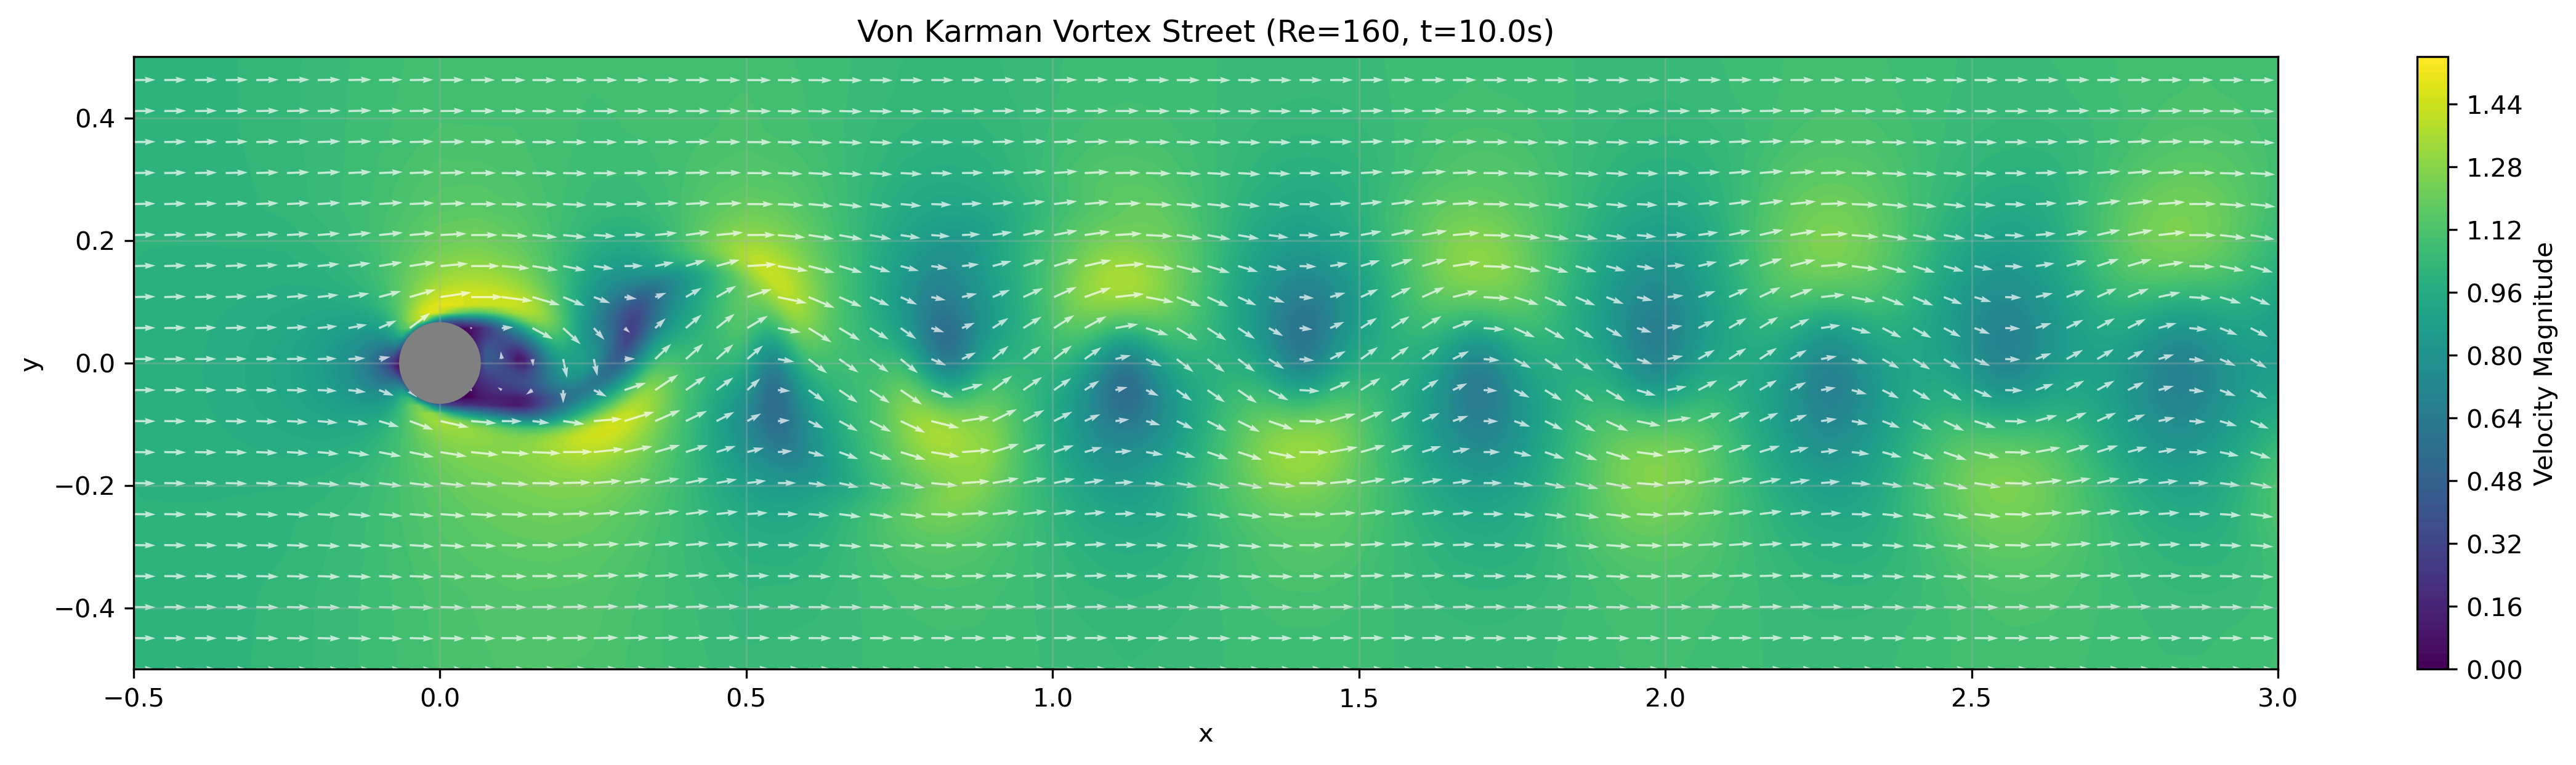

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Get coordinates
x = ds.variables['xdim'][:]
y = ds.variables['ydim'][:]
t = ds.variables['tdim'][:]
X, Y = np.meshgrid(x, y)

# Get velocity at timestep 500
timestep = 1000
u = ds.variables['u'][timestep, :, :]
v = ds.variables['v'][timestep, :, :]
vel_mag = np.sqrt(u**2 + v**2)

# Get constants
radius = ds.variables['radius'][:][0]
Re = ds.variables['Re'][:][0]
time = t[timestep]

# Create figure
fig, ax = plt.subplots(figsize=(16, 4), dpi=300)

# Velocity magnitude contour
contour = ax.contourf(X, Y, vel_mag, levels=100, cmap='viridis')      
plt.colorbar(contour, ax=ax, label='Velocity Magnitude')

# Quiver plot for velocity arrows
skip = 4  # arrow skip factor
scale_reference = np.percentile(vel_mag, 95)
scale_dynamic = scale_reference * 80
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip],
        u[::skip, ::skip], v[::skip, ::skip],
        color='white', alpha=0.7, scale=scale_dynamic, width=0.001) 

# Draw cylinder
circle = Circle((0, 0), radius, color='gray', fill=True, zorder=10,   
                edgecolor='black', linewidth=2)
ax.add_patch(circle)

# Formatting
ax.set_xlim(x.min(), 3)
ax.set_ylim(y.min(), y.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Von Karman Vortex Street (Re={Re:.0f}, t={time:.1f}s)')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('flow_field_t500.png', dpi=300, bbox_inches='tight')      
plt.show()